In [25]:
# !pip install pandas

import numpy as np 
import pandas as pd 
import os

In [26]:
!cat ./dataset/classes.py

ENCODING_MAP = {
    "-": (0, 0),  # Sky
    "o": (0, 100),  # Coin
    "X": (1, 100),  # Ground
    "S": (0, 115),  # Brick
    "C": (0, 130),  # Coin Brick Block
    "U": (0, 145),  # Mushroom Brick Block
    "?": (0, 160),  # Special Question Block
    "!": (0, 175),  # Question Block
    "1": (0, 190),  # Invisible 1 up block
    "2": (0, 205),  # Invisible coin block
    "g": (2, 100), # Goomba (Removed E)
    "G": (2, 115), # Winged Goomba
    "k": (2, 130), # Green Koopa
    "K": (2, 145), # Winged Green Koopa
    "r": (2, 160), # Red Koopa
    "R": (2, 175), # Winged Red Koopa
    "y": (2, 190), # Spiky
    "B": (2, 205), # Bullet Billington head
    "b": (2, 220), # Bullet Billington body
    "<": (3, 100), # Top left pipe
    ">": (3, 115), # Top right pipe
    "(": (3, 130), # Top left pipe with plant
    ")": (3, 145), # Top right pipe with plant
    "[": (3, 175), # Left pipe
    "]": (3, 190), # Right pipe
    "#": (0, 220), # Hard Block
    "L": (1, 150), # 1 Up Block
  

In [27]:
import json


file_path = './dataset/full_level.json'

# Open and load the JSON file
with open(file_path, 'r') as file:
    data = json.load(file)

# Display the loaded data
len(data), len(data[0]), len(data[0][0])

(1360, 16, 16)

In [28]:
from dataset.classes import ENCODING_MAP

In [29]:
ENCODING_MAP

{'-': (0, 0),
 'o': (0, 100),
 'X': (1, 100),
 'S': (0, 115),
 'C': (0, 130),
 'U': (0, 145),
 '?': (0, 160),
 '!': (0, 175),
 '1': (0, 190),
 '2': (0, 205),
 'g': (2, 100),
 'G': (2, 115),
 'k': (2, 130),
 'K': (2, 145),
 'r': (2, 160),
 'R': (2, 175),
 'y': (2, 190),
 'B': (2, 205),
 'b': (2, 220),
 '<': (3, 100),
 '>': (3, 115),
 '(': (3, 130),
 ')': (3, 145),
 '[': (3, 175),
 ']': (3, 190),
 '#': (0, 220),
 'L': (1, 150),
 'E': (2, 220)}

In [30]:
from dataset.classes import ENCODING_MAP2

In [31]:

value = ENCODING_MAP2.get_value('X')  
key = ENCODING_MAP2.get_key((2, 100)) 

print(f"Value for key 'X': {value}")
print(f"Key for value (2, 100): {key}")

Value for key 'X': (1, 100)
Key for value (2, 100): g


In [32]:
import numpy as np 

tensor_list = []
for idx, img_data in enumerate(data):
    # Convert the 16x16 nested list to a numpy array
    tensor = np.zeros((16, 16, 4))
    for i, row in enumerate(img_data):
        for j, value in enumerate(row):
            channel, value = ENCODING_MAP[value]
            tensor[i, j, channel] = value
    tensor_list.append(tensor)
    # Create an image from the numpy array
    # img = Image.fromarray(img_array)
    
    # Save the image
    # img.save(f'tensor_test/image_{idx}.png')

In [33]:
len(tensor_list)

1360

In [34]:
from PIL import Image
import numpy as np
tiles_dir = 'dataset/tiles'
chars2pngs = {
        "-": Image.open(f"{tiles_dir}/smb-background.png"),
        "X": Image.open(f"{tiles_dir}/ground.png"),
        "#": Image.open(f"{tiles_dir}/smb-unpassable.png"),
        "S": Image.open(f"{tiles_dir}/smb-breakable.png"),
        "?": Image.open(f"{tiles_dir}/special_question_block.png"),
        "Q": Image.open(f"{tiles_dir}/special_question_block.png"),
        "o": Image.open(f"{tiles_dir}/coin.png"),
        "E": Image.open(f"{tiles_dir}/blue_goomba.png"),
        "<": Image.open(f"{tiles_dir}/smb-tube-top-left.png"),
        ">": Image.open(f"{tiles_dir}/smb-tube-top-right.png"),
        "(": Image.open(f"{tiles_dir}/white_pipe_top_left.png"),
        ")": Image.open(f"{tiles_dir}/white_pipe_top_right.png"),
        "[": Image.open(f"{tiles_dir}/smb-tube-lower-left.png"),
        "]": Image.open(f"{tiles_dir}/smb-tube-lower-right.png"),
        "x": Image.open(f"{tiles_dir}/smb-path.png"),  # self-created
        "Y": Image.fromarray(
            np.uint8(np.zeros((16, 16)))
        ),  # black square,  # self-created
        "N": Image.open(f"{tiles_dir}/N.png"),  # self-created
        "B": Image.open(f"{tiles_dir}/cannon_top.png"),
        "b": Image.open(f"{tiles_dir}/cannon_bottom.png"),
        "F": Image.open(f"{tiles_dir}/icon_interrogation.png"),

        "C": Image.open(f"{tiles_dir}/yellow_brick.png"), # Coin Brick Block
        "U": Image.open(f"{tiles_dir}/red_brick.png"), # Mushroom Brick Block
        "!": Image.open(f"{tiles_dir}/smb-question.png"), # Question Block (changed from Q)
        "L": Image.open(f"{tiles_dir}/life.png"), # Invisible 1 up block
        "2": Image.open(f"{tiles_dir}/coin2.png"), # Invisible coin block
        "g": Image.open(f"{tiles_dir}/goomba.png"),
        "G": Image.open(f"{tiles_dir}/white_goomba.png"),
        "k": Image.open(f"{tiles_dir}/koopa.png"),
        "K": Image.open(f"{tiles_dir}/winged_koopa.png"),
        "r": Image.open(f"{tiles_dir}/red_koopa.png"),
        "R": Image.open(f"{tiles_dir}/winged_red_koopa.png"),
        "y": Image.open(f"{tiles_dir}/spiny.png"),
        "t": Image.open(f"{tiles_dir}/icon_interrogation.png"),
        "T": Image.open(f"{tiles_dir}/icon_interrogation.png"),
    }

In [35]:
import math
import os
from typing import List, Union
from PIL import Image

def char_array_to_image(array, chars2pngs, target_size=None):
    """
    Convert a 16-by-16 array of integers into a PIL.Image object
    param: array: a 16-by-16 array of integers
    """
    if target_size is None:
        image = Image.new("RGB", (array.shape[1] * 16, array.shape[0] * 16))
    else:
        image = Image.new("RGB", (target_size[1] * 16, target_size[0] * 16))
    print(array.shape)
    for i in range(array.shape[0]):  # Iterate over rows
        for j in range(array.shape[1]):  # Iterate over columns
            max_value = np.max(array[i, j, :])
            max_index = np.argmax(array[i, j, :])
            value = chars2pngs[ENCODING_MAP2.get_key((max_index, max_value))]  # Retrieve the item            
            # for k in range(array.shape[2]):  # Iterate over channels
            #     value = chars2pngs[ENCODING_MAP2.get_key((k, array[i,j,k]))]  # Retrieve the item
            #     # Process the item here
            #     # print(f"Item at position ({i}, {j}, {k}): {item}")
            image.paste(value, (j * 16, i * 16))  

    # for row in range(array.shape[0]):
    #     for col, char in enumerate(array[row]):
    #         value = chars2pngs["-"]
    #         if char in chars2pngs:
    #             value = chars2pngs[char]
    #         else:
    #             print(f"REPLACING {value}", (col, row))
    return image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..100.0].


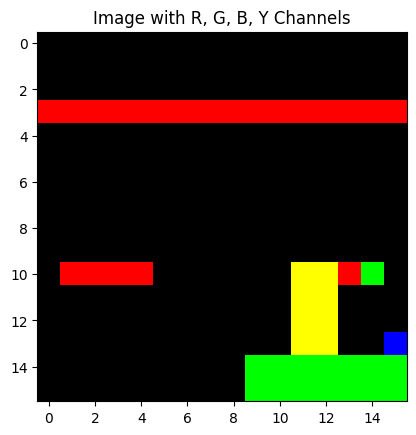

(16, 16, 4)


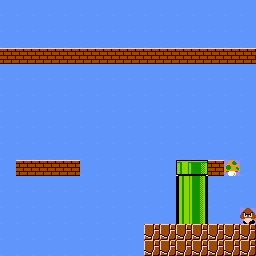

In [36]:
# !pip -q install matplotlib
import matplotlib.pyplot as plt

# idx = 20
idx = 32
r = tensor_list[idx][:, :, 0]
g = tensor_list[idx][:, :, 1]
b = tensor_list[idx][:, :, 2]
y = tensor_list[idx][:, :, 3]

# Modify red and green channels based on yellow intensity
r = r + y  # Add yellow to red
g = g + y  # Add yellow to green

# Clip values to the valid range (0-1)
r = np.clip(r, 0, 1)
g = np.clip(g, 0, 1)

rgba_image = np.stack([r, g, b], axis=-1) 

plt.imshow(rgba_image)
plt.title("Image with R, G, B, Y Channels")
plt.show()
char_array_to_image(tensor_list[idx], chars2pngs)

In [37]:
aggregated_tensor = np.stack(tensor_list, axis=0)

In [38]:
!python3 -m pip -q install tensorflow

In [39]:
import tensorflow as tf
import numpy as np

# Hyperparameters
epochs = 8000
batch_size = 16
half_batch = batch_size // 2

# Generate fake data for testing
# Assume input shape is (16, 4, 4) based on your DCGAN settings
num_samples = 1000  # Number of samples
img_rows, img_cols, channels = 16, 16, 4
# feature_input_data = np.random.rand(num_samples, img_rows, img_cols, channels).astype('float32')


In [40]:
from model import DCGAN

In [ ]:
import matplotlib.pyplot as plt

# Initialize the DCGAN model
dcgan = DCGAN(img_rows=16, img_cols=16, channel=4)

# Get the models
discriminator = dcgan.discriminator_model()
generator = dcgan.generator()
adversarial_model = dcgan.adversarial_model()

# Lists to store losses
d_losses = []
g_losses = []

Model: "Feature_Extraction"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 16, 4, 4)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 4, 16)      │           592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 4, 32)      │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 46)             │        94,254 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,486 (388.62 KB)

 Trainable params: 99,486 (388.62 KB)

 Non-trainable params: 0 (0.00 B)

Model: "Generator"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 16, 4, 4)  │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_11      │ (None, 46)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_5 (Flatten) │ (None, 256)       │          0 │ input_layer_12[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 302)       │          0 │ input_layer_11[0… │
│ (Concatenate)       │                   │            │ flatten_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 2048)      │    620,544 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_2 (Reshape) │ (None, 16, 4, 32) │          0 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_6  │ (None, 16, 4, 64) │     18,496 │ reshape_2[0][0]   │
│ (Conv2DTranspose)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_7  │ (None, 16, 4, 32) │     18,464 │ conv2d_transpose… │
│ (Conv2DTranspose)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_8  │ (None, 16, 4, 16) │      4,624 │ conv2d_transpose… │
│ (Conv2DTranspose)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 16, 4, 4)  │        580 │ conv2d_transpose… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 662,708 (2.53 MB)

 Trainable params: 662,708 (2.53 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define checkpoint directory if it doesn't exist
checkpoint_dir = './checkpoints'
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

# Define the checkpoint callback
checkpoint_filepath = os.path.join(checkpoint_dir, 'gan_checkpoint_{epoch:02d}.weights.h5')
# model_checkpoint_callback = ModelCheckpoint(
#     filepath=checkpoint_filepath,
#     save_freq='epoch',  # Save at the end of each epoch
#     # save_weights_only=True,  # Save only the model weights
#     verbose=1  # Print a message when saving
# )

# ... (Your existing code for GAN training) ...

# for epoch in range(epochs):
#     # ... (Your existing code inside the epoch loop) ...

#     # Checkpoint saving at the end of each epoch
#     adversarial_model.save_weights(checkpoint_filepath.format(epoch=epoch + 1)) 
#     print(f"Checkpoint saved for epoch {epoch + 1}")

# Training loop
for epoch in range(epochs):
    for i in range(len(aggregated_tensor) // batch_size):
        # --- Train Discriminator ---
        # Get real samples
        idx_real = np.random.randint(0, aggregated_tensor.shape[0], half_batch)
        real_features = aggregated_tensor[idx_real]
        real_labels = np.ones((half_batch, dcgan.latent_dim))  # Label as "real"

        # Generate fake samples
        latent_vectors = np.random.normal(0, 1, (half_batch, dcgan.latent_dim))
        # print(latent_vectors.shape, real_features.shape)
        fake_features = generator.predict([latent_vectors, real_features])
        fake_labels = np.zeros((half_batch, dcgan.latent_dim))  # Label as "fake"

        # Train discriminator on real and fake data
        d_loss_real = discriminator.train_on_batch(real_features, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_features, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # --- Train Adversarial Model (Generator) ---
        # Generate new latent vectors
        latent_vectors = np.random.normal(0, 1, (batch_size, dcgan.latent_dim))
        # Use ones as labels to "fool" the discriminator into classifying as real
        valid_y = np.ones((batch_size, dcgan.latent_dim))

        # Train generator via the adversarial model
        batch_feature_input = aggregated_tensor[i * batch_size:(i + 1) * batch_size]
        g_loss = adversarial_model.train_on_batch([latent_vectors, batch_feature_input], valid_y)

        # Store losses
        d_losses.append(d_loss)
        g_losses.append(g_loss)

    # Print progress
    print(f"Epoch {epoch + 1}/{epochs} - D Loss: {d_loss[0]:.4f}, D Accuracy: {d_loss[1]:.4f}, G Losses: {g_loss[0]:.4f}, {g_loss[1]:.4f}")
    #add checkpoint saving every 10 epochs
    if (epoch + 1) % 10 == 0:
        generator.save_weights(checkpoint_filepath.format(epoch=epoch + 1)) 
        print(f"Checkpoint saved for epoch {epoch + 1}")

print("Training completed!")

# Plot the losses
plt.figure(figsize=(10, 5))
plt.plot(d_losses, label='Discriminator Loss')
plt.plot(g_losses, label='Generator Loss')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Losses')
plt.show()

ValueError: Value returned by __array__ is not a NumPy array